In [50]:
import numpy as np
import pandas as pd
import os
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'penalty_3.09_window_120_5hours_scale1_10init.txt'
path = os.path.join(os.getcwd(),'results/theta_rej_rate' ,FILE_NAME)
with open(path, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej.sort_values(by='Theta', inplace=True)
theta_rej

,Theta,Rejection Rate
0,0.0,0.334564
80,0.0,0.335549
69,0.0,0.328429
61,0.0,0.330209
144,0.0,0.332974
...,...,...
48,10.0,0.331080
62,10.0,0.330966
67,10.0,0.332784
50,10.0,0.329849


In [75]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean()
(mean_rejection_rates.iloc[21], mean_rejection_rates.index[21])

(0.3340491204150807, 3.0)

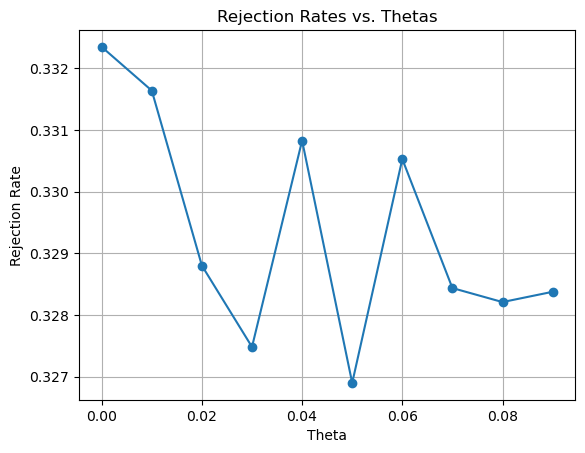

In [54]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()

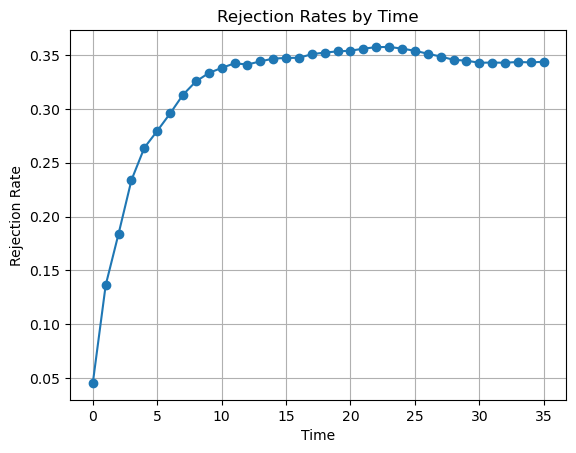

In [91]:
import ast
import matplotlib.dates as mdates
from datetime import datetime, timedelta

FILE_NAME = f"theta_0.0_0.0_penalty_3.09_window_120_3hours.txt"

path = os.path.join(os.getcwd(),'results/rej_rate_accumulated' ,FILE_NAME)
with open(path , 'r') as result:
    rej_list = result.read()

# Convert the string representation of the list to an actual list of floats
rej_list = ast.literal_eval(rej_list)

# Plot the data
plt.plot(rej_list, marker='o')
plt.xlabel('Time')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates by Time')
plt.grid(True)

plt.show()